___


# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">**US Army Anthropometric Survey Multi-Classification**</h1>
# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">*Support Vector Machines, Logistic Regression, Random Forest and XGBoost* </h1>
# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">*Imbalanced Classification* </h1>

___

# WELCOME!

In this project, we must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, we will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working dfbases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, we must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

We will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of our models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model we choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [160]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import pyforest
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from yellowbrick.classifier import ClassPredictionError
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [161]:
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding='latin1')
#df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')

In [162]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv")
# df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [163]:
df_male.head(3)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand


In [164]:
df_female.head(3)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand


In [165]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [166]:
df2 = pd.concat([df_male,df_female], axis=0, ignore_index=True) 
df=df2.copy()
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [167]:
df.shape # subject id +1

(6068, 109)

In [168]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [169]:
df.isnull().sum().any()

True

In [170]:
df.duplicated().sum()

0

In [171]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")
  # Gender, SubjectsBirthLocation, WritingPreference are important
    

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
Ethnicity has 209 unique value
WritingPreference has 3 unique value


In [172]:
df.select_dtypes(include = "object").describe().T 

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [173]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

Text(0, 0.5, 'Count')

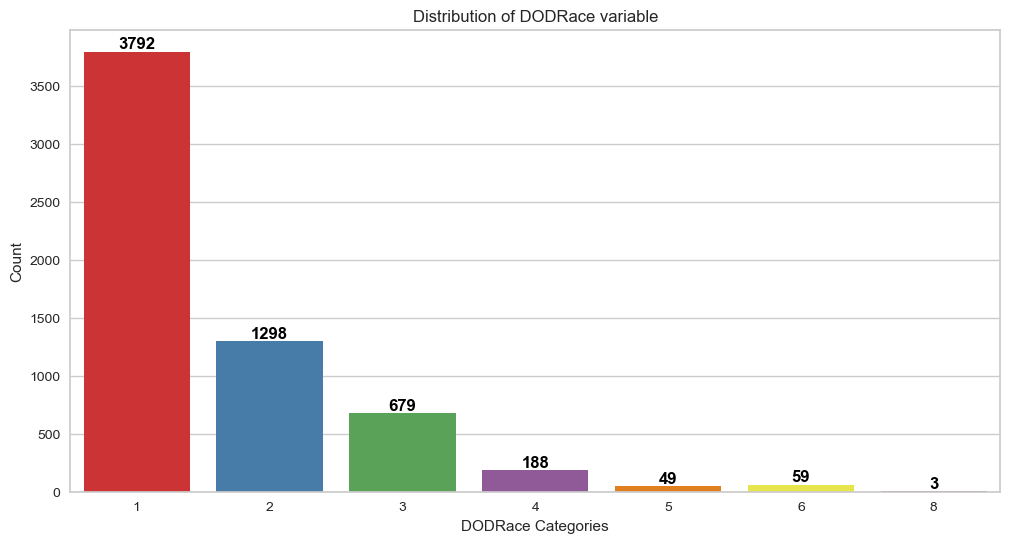

In [174]:
# with seaborn
plt.figure(figsize=(12,6))
colors=sns.color_palette('Set1')
ax = sns.countplot(x='DODRace', data=df,palette = 'Set1')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.title('Distribution of DODRace variable')
plt.xlabel('DODRace Categories')
plt.ylabel('Count')

In [175]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [176]:
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") |
                (df["DODRace"] == "Hispanic")]
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,White,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,White,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,Black,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,White,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,19

In [177]:
df.shape # past 6068  - (4: "Asian", 5: "Native American", 6: "Pacific Islander", 8: "Other")

(5769, 109)

In [178]:
drop_list =[]
for col in df:
  if df[col].isnull().sum()>1800: # 1/3 null+ I will drop it
    print(f"{col} = {df[col].isnull().sum()}")
    drop_list.append(col)
  
  
drop_list 

subjectid = 1870
Ethnicity = 4644
SubjectId = 3899


['subjectid', 'Ethnicity', 'SubjectId']

In [179]:
# df["Ethnicity"].sort_values().unique()
df.Ethnicity.value_counts(dropna=False).head(10)

Ethnicity
NaN                       4644
Mexican                    356
Puerto Rican               183
Caribbean Islander         123
Cherokee                    60
Dominican                   32
Colombian                   17
Cuban                       17
Arab or Middle Eastern      16
Salvadoran                  16
Name: count, dtype: int64

In [180]:
#df["SubjectId"].sort_values().unique()
df.SubjectId.value_counts(dropna=False) # explanation of person, related with target

SubjectId
NaN         3899
25722.0        1
25762.0        1
25761.0        1
25760.0        1
            ... 
18083.0        1
18082.0        1
18081.0        1
18080.0        1
920103.0       1
Name: count, Length: 1871, dtype: int64

In [181]:
#df["subjectid"].sort_values().unique()
df.subjectid.value_counts(dropna=False)

subjectid
NaN        1870
26625.0       1
26165.0       1
26168.0       1
26169.0       1
           ... 
14992.0       1
14994.0       1
14995.0       1
14996.0       1
17152.0       1
Name: count, Length: 3900, dtype: int64

In [182]:
df.drop(drop_list, axis=1, inplace=True) # dropped: subjectid, Ethnicity, SubjectId

In [183]:
df.DODRace.unique()

array(['White', 'Black', 'Hispanic'], dtype=object)

In [184]:
colors = ['gold', 'mediumturquoise']
labels = ['White','Black',"Hispanic"]
values = df['DODRace'].value_counts()
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.2)])
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Race Categories",
    title_x=0.5,
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
    height=400,
    width=600,
)
fig.show()
# Black:1298, Hispanic: 679, White:3792

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [185]:
df.groupby(["Component"])["DODRace"].value_counts() #.iplot(kind="barh")

Component            DODRace 
Army National Guard  White       1855
                     Black        499
                     Hispanic     253
Army Reserve         White        114
                     Black         52
                     Hispanic      41
Regular Army         White       1823
                     Black        747
                     Hispanic     385
Name: count, dtype: int64

In [186]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts()#.iplot(kind="barh")

Component            Branch                  DODRace 
Army National Guard  Combat Arms             White       623
                                             Black        79
                                             Hispanic     74
                     Combat Service Support  White       917
                                             Black       312
                                             Hispanic    142
                     Combat Support          White       315
                                             Black       108
                                             Hispanic     37
Army Reserve         Combat Arms             White         5
                                             Hispanic      1
                     Combat Service Support  White        82
                                             Hispanic     30
                                             Black        24
                     Combat Support          Black        28
                               

In [187]:
df.Component.value_counts().head(10)
#df["Component"].sort_values().unique()

Component
Regular Army           2955
Army National Guard    2607
Army Reserve            207
Name: count, dtype: int64

In [188]:
df.Date.value_counts().head(10)
#df["Date"].sort_values().unique()


Date
5-Apr-12     43
5-Mar-12     43
28-Feb-12    42
26-May-11    40
21-Feb-12    40
6-Mar-12     40
26-Mar-12    39
15-Mar-11    39
27-Feb-12    39
29-Feb-12    39
Name: count, dtype: int64

In [189]:
#df["Gender"].sort_values().unique()
df.Gender.value_counts(dropna=False)

Gender
Male      3899
Female    1870
Name: count, dtype: int64

In [190]:
df["Weightlbs"].sort_values().unique()
#df.Weightlbs.value_counts(dropna=False)

array([  0,  86,  88,  90,  95,  96,  98, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 265,
       267, 268, 270, 272, 274, 275, 276, 279, 280, 283, 285, 29

In [191]:
df["Heightin"].sort_values().unique()
#df.Heightin.value_counts(dropna=False)

array([56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 86, 87, 94], dtype=int64)

In [192]:
df["PrimaryMOS"].sort_values().unique()   # technical expertised
#df.PrimaryMOS.value_counts(dropna=False).head(10)

array(['00Z', '09L', '11A', '11B', '11C', '11H', '11Z', '120A', '12A',
       '12B', '12C', '12E', '12H', '12K', '12M', '12N', '12P', '12R',
       '12T', '12V', '12W', '12Y', '12Z', '131A', '13A', '13B', '13D',
       '13E', '13F', '13M', '13P', '13R', '13S', '13T', '13Z', '14A',
       '14E', '14H', '14J', '14S', '14T', '14Z', '15B', '15D', '15E',
       '15F', '15G', '15N', '15P', '15Q', '15R', '15S', '15T', '15U',
       '15V', '15W', '15Y', '15Z', '16G', '18A', '18F', '18Z', '19A',
       '19B', '19C', '19D', '19K', '19X', '19Z', '21A', '21B', '21C',
       '21E', '21H', '21J', '21N', '21R', '21T', '21V', '21W', '21X',
       '21Z', '250N', '251A', '254A', '25A', '25B', '25C', '25D', '25E',
       '25F', '25G', '25H', '25L', '25M', '25N', '25P', '25Q', '25S',
       '25T', '25U', '25V', '25W', '25X', '25Z', '26U', '270A', '27A',
       '27D', '29E', '31A', '31B', '31E', '34A', '34F', '350F', '350G',
       '351', '351B', '351L', '351M', '352N', '352P', '353T', '356H',
       '35B'

In [193]:
df["Branch"].sort_values().unique()
#df.Branch.value_counts(dropna=False).head(10)

array(['Combat Arms', 'Combat Service Support', 'Combat Support'],
      dtype=object)

In [194]:
# df["SubjectNumericRace"].sort_values().unique()
df.SubjectNumericRace.value_counts(dropna=False).head(10)

SubjectNumericRace
1      3559
2      1025
3       541
31      159
8       106
51      102
21       60
23       34
28       26
251      20
Name: count, dtype: int64

In [195]:
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin",  
]
df.drop(drop_list1, axis=1, inplace=True)
# Heightin – Height in Inches; self-reported, comparable to measured “stature” (cm)
# Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”
# Date – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”
# Installation – U.S. Army installation where the measurement occurred; e.g. “Fort Hood”, “Camp Shelby”- where the measurement occurred 
# Component – “Army National Guard”, “Army Reserve”, or “Regular Army”- ---- working place
# Branch – “Combat Arms”, “Combat Support”, or “Combat Service Support”----  Branch
# PrimaryMOS – Primary Military Occupational Specialty ---   specialty

In [196]:
df.drop("SubjectNumericRace", axis=1, inplace=True) # SubjectNumericRace is similar with target
                                                    

In [197]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [198]:
df.reset_index(drop=True, inplace=True)

In [199]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

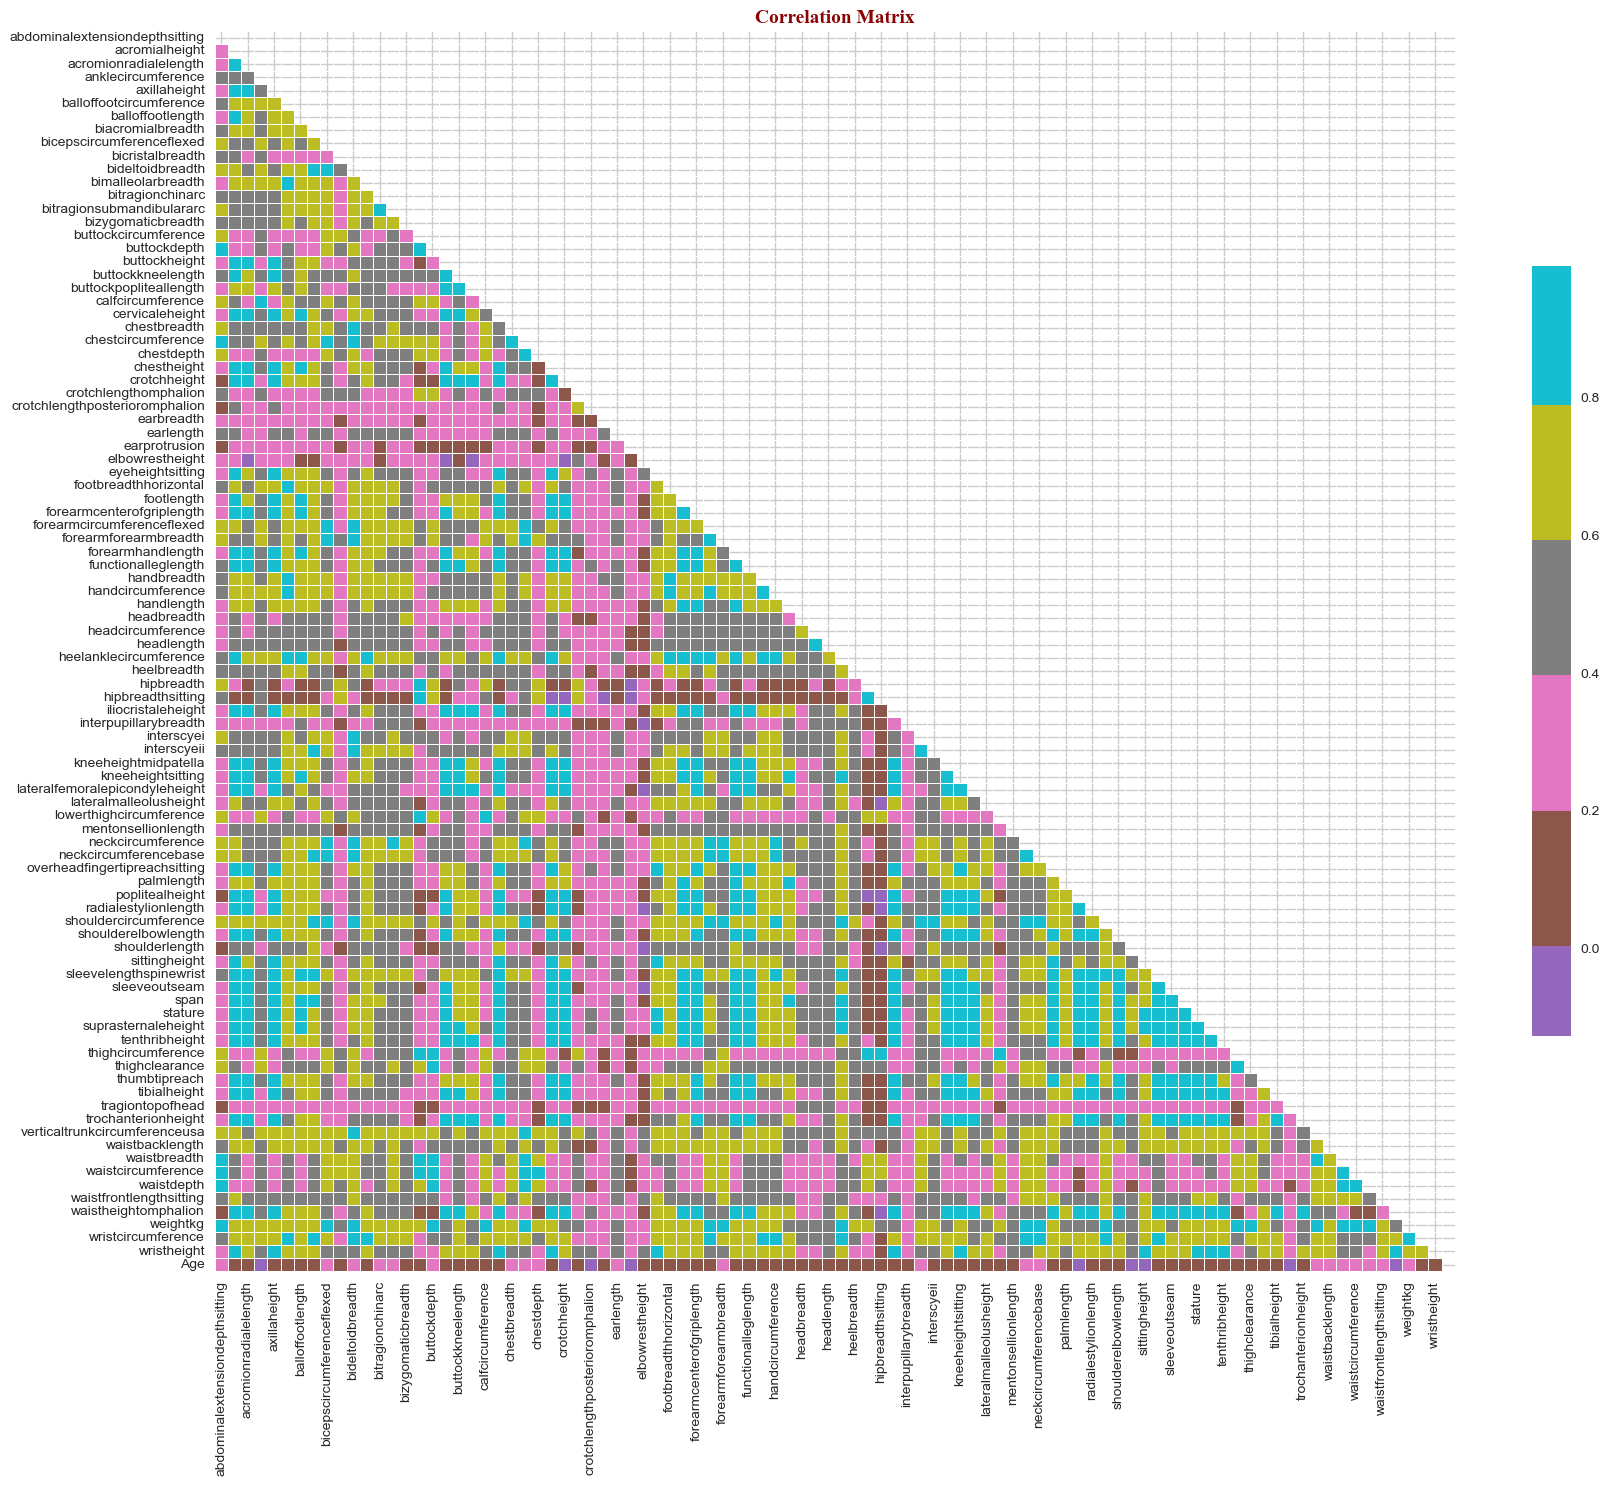

In [200]:
plt.figure(figsize=(20,20))
corr = df.select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="tab10",  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix", fontdict=font_title);

In [201]:
df_temp = df.select_dtypes(include='number').corr()  #multicollinearity

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .95 and df_temp[col][i] < 1) or (df_temp[col][i]< -.95 and df_temp[col][i] > -1) : # 95 yaptım değiştirilebilir
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")

In [202]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistdepth
1,acromialheight,axillaheight
2,acromialheight,cervicaleheight
3,acromialheight,chestheight
4,acromialheight,stature
5,acromialheight,suprasternaleheight
6,acromionradialelength,shoulderelbowlength
7,axillaheight,acromialheight
8,axillaheight,cervicaleheight
9,axillaheight,chestheight


In [203]:
df_col.value_counts("feature")# %95+

feature
axillaheight                      6
acromialheight                    5
stature                           5
suprasternaleheight               5
cervicaleheight                   5
chestheight                       5
waistdepth                        2
kneeheightsitting                 2
tenthribheight                    2
tibialheight                      2
waistcircumference                2
kneeheightmidpatella              2
trochanterionheight               1
waistbreadth                      1
sittingheight                     1
shoulderelbowlength               1
neckcircumferencebase             1
neckcircumference                 1
abdominalextensiondepthsitting    1
interscyeii                       1
iliocristaleheight                1
handcircumference                 1
handbreadth                       1
forearmhandlength                 1
forearmcenterofgriplength         1
footlength                        1
eyeheightsitting                  1
buttockheight       

In [204]:
df_numeric = df.select_dtypes(include ="number")


In [205]:
def outlier_report(df, cols, whisker=3):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T
res = outlier_report(df, df_numeric)

In [206]:
res  

,lower_limit,upper_limit,iqr,# of outliers
abdominalextensiondepthsitting,64.0,428.0,52.0,1.0
chestdepth,126.0,378.0,36.0,1.0
hipbreadth,236.0,460.0,32.0,2.0
hipbreadthsitting,235.0,536.0,43.0,2.0
lowerthighcircumference,255.0,556.0,43.0,1.0
thighclearance,103.0,250.0,21.0,1.0
waistdepth,57.0,400.0,49.0,1.0


In [207]:
df.to_csv("soldier_race_EDA.csv",index=False)

In [208]:
df = pd.read_csv("soldier_race_EDA.csv")
df2=df.copy()
df.shape

(5769, 98)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [209]:
X = df.drop("DODRace", axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = df.DODRace

In [210]:
X.shape

(5769, 232)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y) # stratify =y for balance

In [212]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [213]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)
pipe_log_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [214]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [215]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)
# Black:1298, Hispanic: 679, White:3792

Test_Set
[[240  13   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  21  456   66]
 [  58  355 2621]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [216]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]), # I focused on Hispanic
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [217]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.599993
test_precision_Hispanic    0.492007
test_recall_Hispanic       0.771481
dtype: float64

nots= (class_weight={0:0.3, 1:0.6, 2:0.1}
weights = np.linspace(0.0,0.99,200)
class_weight': [{0:x, 1:1.0-x} for x in weights]

### Logistic Model GridsearchCV

In [218]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"]) 

In [219]:
param_grid = {
    "log__C":  [1.18, 1.19, 1.17], #  I've used it before with the different parameters (np.arange(1e-05, 3, 0.1), [0.1, 0.5, 1], 'C' : np.logspace(-4, 4, 20))
    'log__penalty': ["l2"], # I've used it before with the "l1" parameter.
    'log__solver': ["lbfgs"], # I've used it before with the "liblinear" and "saga" parameters.
    }

In [220]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring=recall_Hispanic, # GridSearchCV's result give one score in pipeline, I defined recall_Hispanic
                              n_jobs=-1, refit=True, cv=5)

In [221]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [1.18, 1.19, 1.17], 'log__penalty': ['l2'],
                         'log__solver': ['lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [222]:
log_model_grid.best_params_  

{'log__C': 1.18, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [223]:
log_model_grid.best_score_

0.771627590893646

In [224]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  5 110  21]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.81      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 972   37   29]
 [  21  457   65]
 [  59  356 2619]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [225]:
from sklearn.metrics import ConfusionMatrixDisplay

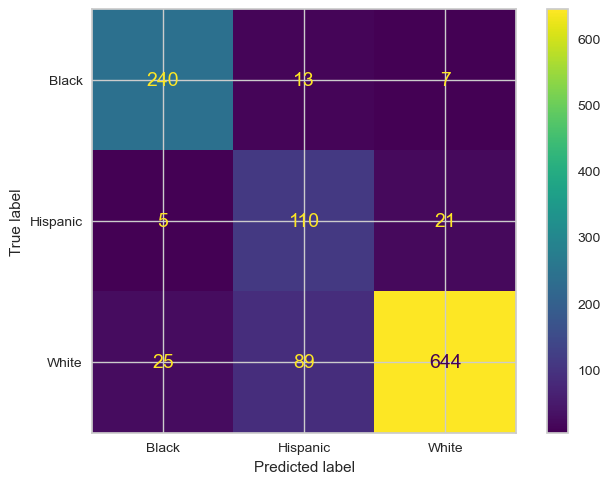

In [226]:
y_pred = log_model_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=log_model_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model_grid.classes_)
disp.plot()

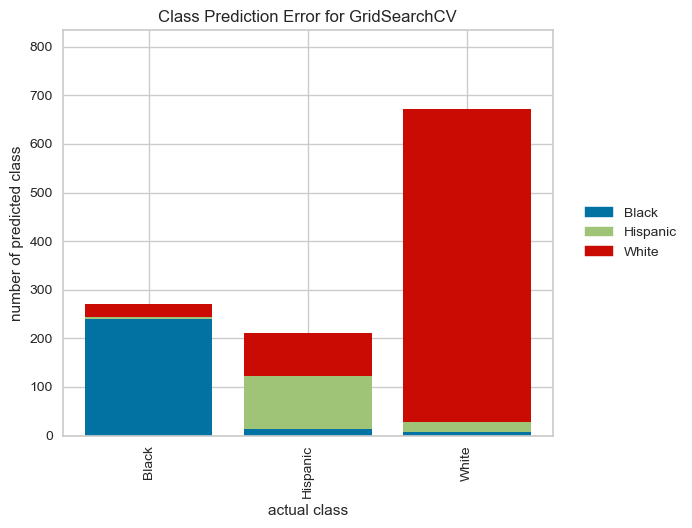

In [227]:
visualizer = ClassPredictionError(log_model_grid)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

In [228]:
log_model_grid.classes_

array(['Black', 'Hispanic', 'White'], dtype=object)

In [229]:
# plt.figure(figsize=(14,6))

# y_pred = log_model_grid.predict(X_test)
# cf_matrix = confusion_matrix(y_test, y_pred)
# group_names = ['True Black (TP)', 'False Positives (FP)\n(Type I Error)', 'False Negatives (FN)',
#                'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)', 'True Positives (TP)',
#                'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)', 'True Positives (TP)',]
# group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
# # labels=log_model_grid.classes_
# labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# labels = np.asarray(labels).reshape(3, 3)

# ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
# ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

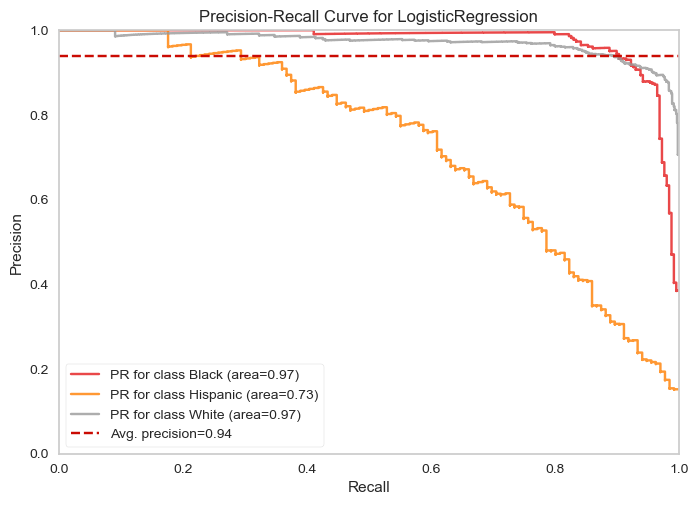

In [230]:
from yellowbrick.classifier import PrecisionRecallCurve #imbalanced data

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', penalty= 'l2', solver= 'lbfgs', C= 1.18, max_iter=2000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"], # same order, sequence log_model_grid.classes_
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [231]:
viz.score_#["Hispanic"]

{'Black': 0.9744319490408767,
 'Hispanic': 0.7337432381026494,
 'White': 0.9716002409082906,
 'micro': 0.9386954148408563}

In [232]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"] # only "Hispanic"
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"]) # in multiclass ----labels and average, labels possible ["Hispanic", "Black"]
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"]) # average=None or you  can use others 'micro', 'macro', 'samples', 'weighted', 'binary'

In [233]:
f1_score(y_test, y_pred, average=None, labels=["Hispanic"])


array([0.63218391])

## Lojistic Regression solver "liblenear" for small dataset

In [234]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', penalty="l1",max_iter=1000,random_state=101,
                                                                    solver="liblinear" ))] #"liblinear" only works with penalty="l1"
pipe_log_model_libl = Pipeline(steps=operations)

In [235]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[246   3  11]
 [  5  96  35]
 [ 19  33 706]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93       260
    Hispanic       0.73      0.71      0.72       136
       White       0.94      0.93      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 973   19   46]
 [  30  385  128]
 [  44  147 2843]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.70      0.71      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [236]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.644959
test_precision_Hispanic    0.662196
test_recall_Hispanic       0.631380
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [237]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [238]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [  5 111  20]
 [ 22 107 629]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.48      0.82      0.61       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 959   41   38]
 [  22  452   69]
 [  53  422 2559]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [239]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.571221
test_precision_Hispanic    0.457893
test_recall_Hispanic       0.762256
dtype: float64

###  SVC Model GridsearchCV

In [240]:
param_grid = {
    'svc__C': [1.8],  # I've used it before with the "[1,2,3]" parameters.
    'svc__gamma': [0.1, 0.2, 0.3], # I've used it before with the "["scale", "auto", 1, 0.1, 0.01]" parameters.
    'svc__kernel': ["rbf"]
    }

In [241]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring=recall_Hispanic, refit=True,
                              n_jobs=-1)

In [242]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1.8], 'svc__gamma': [0.1, 0.2, 0.3],
                         'svc__kernel': ['rbf']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [243]:
svm_model_grid.best_params_

{'svc__C': 1.8, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [244]:
svm_model_grid.best_score_

0.7531090723751274

In [245]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  10  11]
 [  5 109  22]
 [ 21  87 650]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.53      0.80      0.64       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 978   30   30]
 [  11  479   53]
 [  44  308 2682]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.94      1038
    Hispanic       0.59      0.88      0.70       543
       White       0.97      0.88      0.92      3034

    accuracy                           0.90      4615
   macro avg       0.83      0.90      0.86      4615
weighted avg       0.92      0.90      0.90      4615



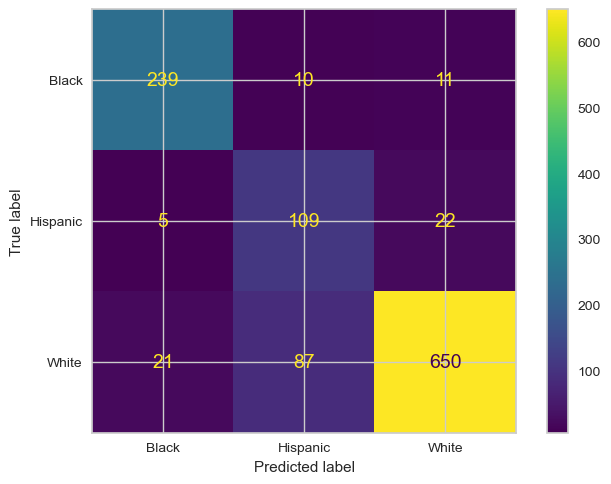

In [246]:
y_pred = svm_model_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=svm_model_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model_grid.classes_)
disp.plot()

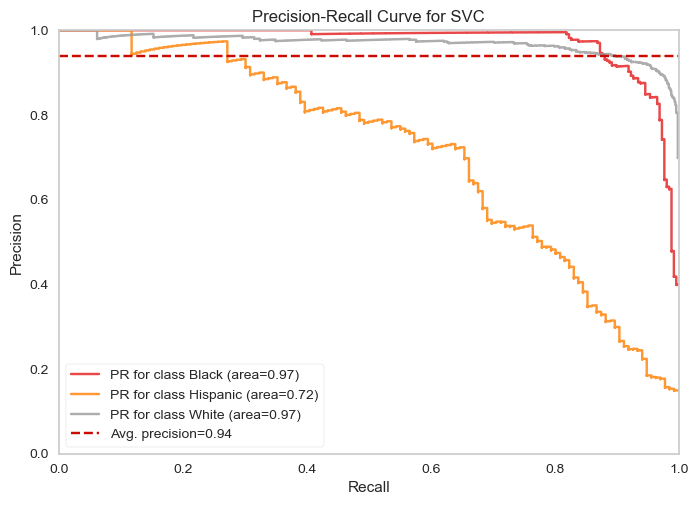

In [247]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=1.8, gamma=0.1, kernel="rbf", class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [248]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [249]:
from sklearn.preprocessing import OrdinalEncoder

In [250]:
df=df2.copy()

In [251]:
X2 = df.drop("DODRace",axis=1) 
y = df.DODRace

In [252]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [253]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,21,2.0


In [254]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [255]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

In [256]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [257]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [258]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[192   1  67]
 [  9   5 122]
 [ 11   0 747]]
              precision    recall  f1-score   support

       Black       0.91      0.74      0.81       260
    Hispanic       0.83      0.04      0.07       136
       White       0.80      0.99      0.88       758

    accuracy                           0.82      1154
   macro avg       0.85      0.59      0.59      1154
weighted avg       0.83      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [259]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.082574
test_precision_Hispanic    0.775000
test_recall_Hispanic       0.044242
dtype: float64

### RF Model GridsearchCV

In [260]:
param_grid = {'n_estimators':[270],  # I've used it before with the "[100, 200,300]" parameters.
             'max_depth':[8], # I've used it before with the "[3,5,6]" parameters.
             "criterion" : ["gini"], # I've used it before with the "["entropy"]" parameters.
             "max_features" : [3], # I've used it before with the "['auto', None,2,4,5,10"]" parameters.
             'min_samples_leaf': [10], # I've used it before with the "[2,5,8,12]" parameters.
             'min_samples_split':[2], # I've used it before with the "["2,3,10,15"]" parameters.
             'bootstrap': [False], # I've used it before with the "["True"]" parameters.               
             }
             

In [261]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [262]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [8], 'max_features': [3],
                         'min_samples_leaf': [10], 'min_samples_split': [2],
                         'n_estimators': [270]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [263]:
rf_grid_model.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 270}

In [264]:
rf_grid_model.best_score_

0.5137954468229697

In [265]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[220  18  22]
 [ 15  76  45]
 [ 57 154 547]]
              precision    recall  f1-score   support

       Black       0.75      0.85      0.80       260
    Hispanic       0.31      0.56      0.40       136
       White       0.89      0.72      0.80       758

    accuracy                           0.73      1154
   macro avg       0.65      0.71      0.66      1154
weighted avg       0.79      0.73      0.75      1154


Train_Set
[[ 974   35   29]
 [  10  490   43]
 [ 104  523 2407]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.47      0.90      0.62       543
       White       0.97      0.79      0.87      3034

    accuracy                           0.84      4615
   macro avg       0.78      0.88      0.80      4615
weighted avg       0.89      0.84      0.85      4615



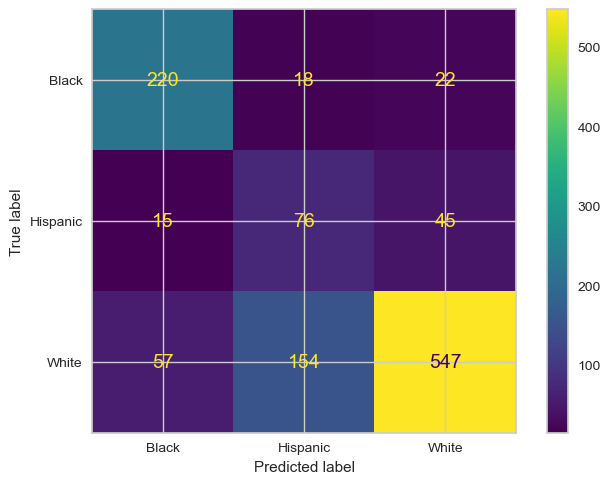

In [266]:
y_pred = rf_grid_model.predict(X_test2)
cm = confusion_matrix(y_test2, y_pred, labels=rf_grid_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid_model.classes_)
disp.plot()

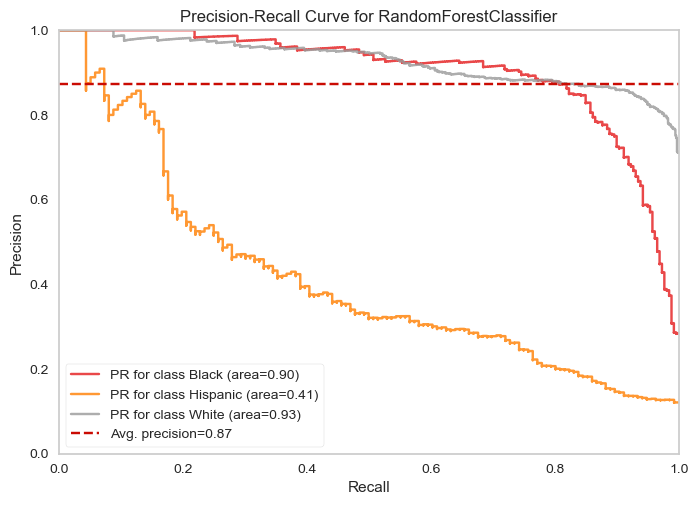

In [267]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=8, bootstrap= False, criterion= "gini",
                        max_features=8, min_samples_leaf=10, min_samples_split=2, n_estimators=270)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [268]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [269]:
df=df2.copy()

In [270]:
cat = df.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'DODRace', 'WritingPreference'], dtype='object')

In [271]:
enc = OrdinalEncoder()
df[cat] = enc.fit_transform(df[cat])
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,2.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,2.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,0.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,2.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,0.0,21,2.0


In [272]:
X2 = df.drop("DODRace",axis=1) 
y = df.DODRace

In [273]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [274]:
xgb_model = XGBClassifier(objective='multi:softprob', eval_metric='merror', random_state=101)

In [275]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)

In [276]:
xgb_model.fit(X_train2, y_train2, sample_weight=classes_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [277]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[234   4  22]
 [ 11  58  67]
 [ 20  19 719]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       260
         1.0       0.72      0.43      0.53       136
         2.0       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.83      0.76      0.78      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1038
         1.0       1.00      1.00      1.00       543
         2.0       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [278]:

y_train2

893     1.0
196     2.0
3821    2.0
3206    2.0
4500    0.0
       ... 
4549    1.0
1487    2.0
3812    2.0
4435    0.0
1748    2.0
Name: DODRace, Length: 4615, dtype: float64

In [279]:
y_test2

2019    2.0
4046    2.0
5563    2.0
3806    2.0
653     1.0
       ... 
2536    2.0
905     2.0
4429    2.0
5286    2.0
3836    1.0
Name: DODRace, Length: 1154, dtype: float64

In [280]:
target_label = 1

In [281]:
scoring_1 = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =[target_label]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =[target_label]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[target_label])}

In [282]:
model = XGBClassifier( random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring_1, cv = 5, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.545910
test_precision_Hispanic    0.712250
test_recall_Hispanic       0.443816
dtype: float64

### XGBoost Model GridsearchCV

In [283]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0       
2.0    0.507031    3034
0.0    1.482017    1038
1.0    2.833026     543
Name: count, dtype: int64

In [284]:
param_grid = {"n_estimators":[100],     # I've used it before with the diffirent parameters.["64,100,128,250"]
              'max_depth':[3],          # I've used it before with the diffirent parameters.
              "learning_rate": [0.3],   # I've used it before with the diffirent parameters.
              "subsample":[1],          # I've used it before with the diffirent parameters.
              "colsample_bytree":[0.5], # I've used it before with the diffirent parameters.
              "min_child_weight":[5],   # I've used it before with the diffirent parameters.
              "gamma":[1.2],            # I've used it before with the diffirent parameters.
              "reg_alpha":[0.6]         # I've used it before with the diffirent parameters.
                            
              }   
              

In [285]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [286]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1.2,
 'learning_rate': 0.3,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 100,
 'reg_alpha': 0.6,
 'subsample': 1}

In [287]:
# xgb_grid_model.best_score_

In [288]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[231   8  21]
 [ 12  85  39]
 [ 27  82 649]]
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       260
         1.0       0.49      0.62      0.55       136
         2.0       0.92      0.86      0.88       758

    accuracy                           0.84      1154
   macro avg       0.75      0.79      0.77      1154
weighted avg       0.85      0.84      0.84      1154


Train_Set
[[1018    7   13]
 [   1  524   18]
 [  46  189 2799]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1038
         1.0       0.73      0.97      0.83       543
         2.0       0.99      0.92      0.95      3034

    accuracy                           0.94      4615
   macro avg       0.89      0.96      0.92      4615
weighted avg       0.95      0.94      0.94      4615



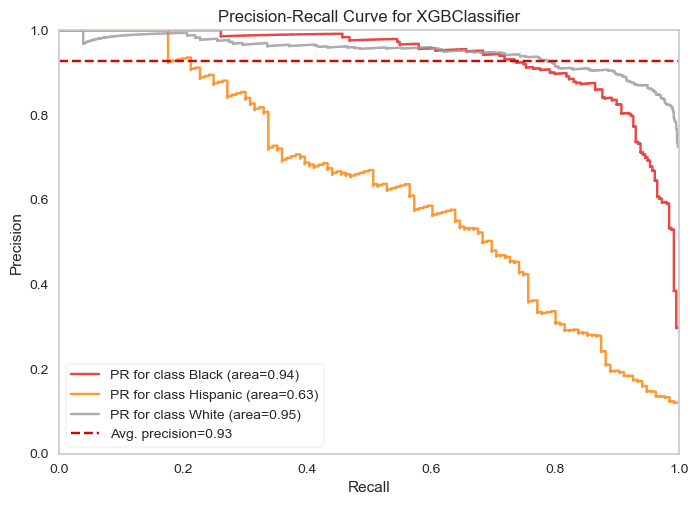

In [289]:
model = XGBClassifier(random_state=101, colsample_bytree= 0.5, gamma= 1.2, learning_rate=0.3, max_depth= 3,
                                        min_child_weight= 3, n_estimators=100, reg_alpha =0.6, subsample=1)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [290]:
y_pred = xgb_grid_model.predict(X_test2)
target_label=1
xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=[target_label])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=[target_label])

In [291]:
# y_pred = xgb_grid_model.predict(X_test2)

# xgb_AP = viz.score_["Hispanic"]
# xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
# xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

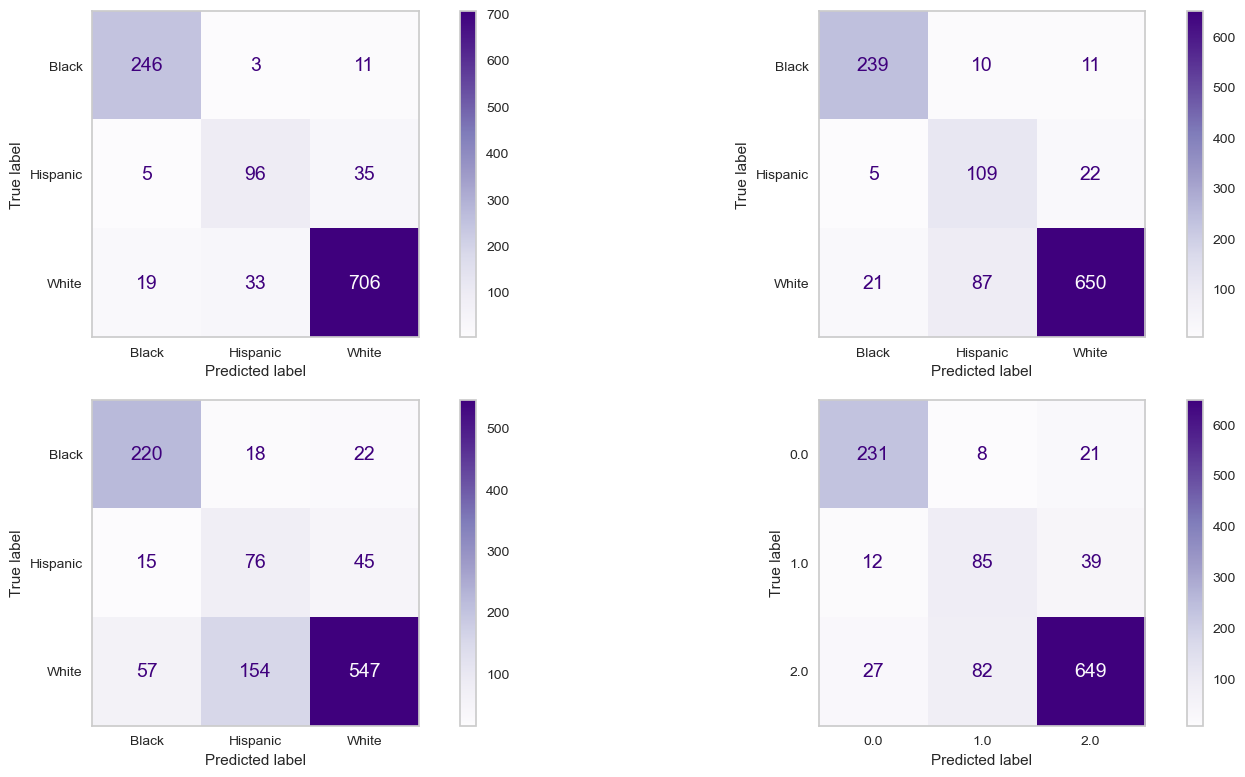

In [292]:
fig, axes = plt.subplots(2,2, figsize=(16,8))
plt.rcParams.update({'font.size': 14})

classifiers = [pipe_log_model_libl,svm_model_grid, rf_grid_model, xgb_grid_model]
for cls, ax in zip(classifiers, axes.flatten()):
    if cls==pipe_log_model_libl:
        plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.Purples, ax=ax)
    elif cls==svm_model_grid:   
        plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.Purples, ax=ax)
    elif cls==rf_grid_model:   
        plot_confusion_matrix(cls, X_test2, y_test, cmap=plt.cm.Purples, ax=ax)
    elif cls==xgb_grid_model:   
        plot_confusion_matrix(cls, X_test2, y_test2, cmap=plt.cm.Purples, ax=ax)
    ax.grid(False)
    # ax.title.set_text(type(cls.columns))

plt.tight_layout()
plt.show()

## Comparing Models

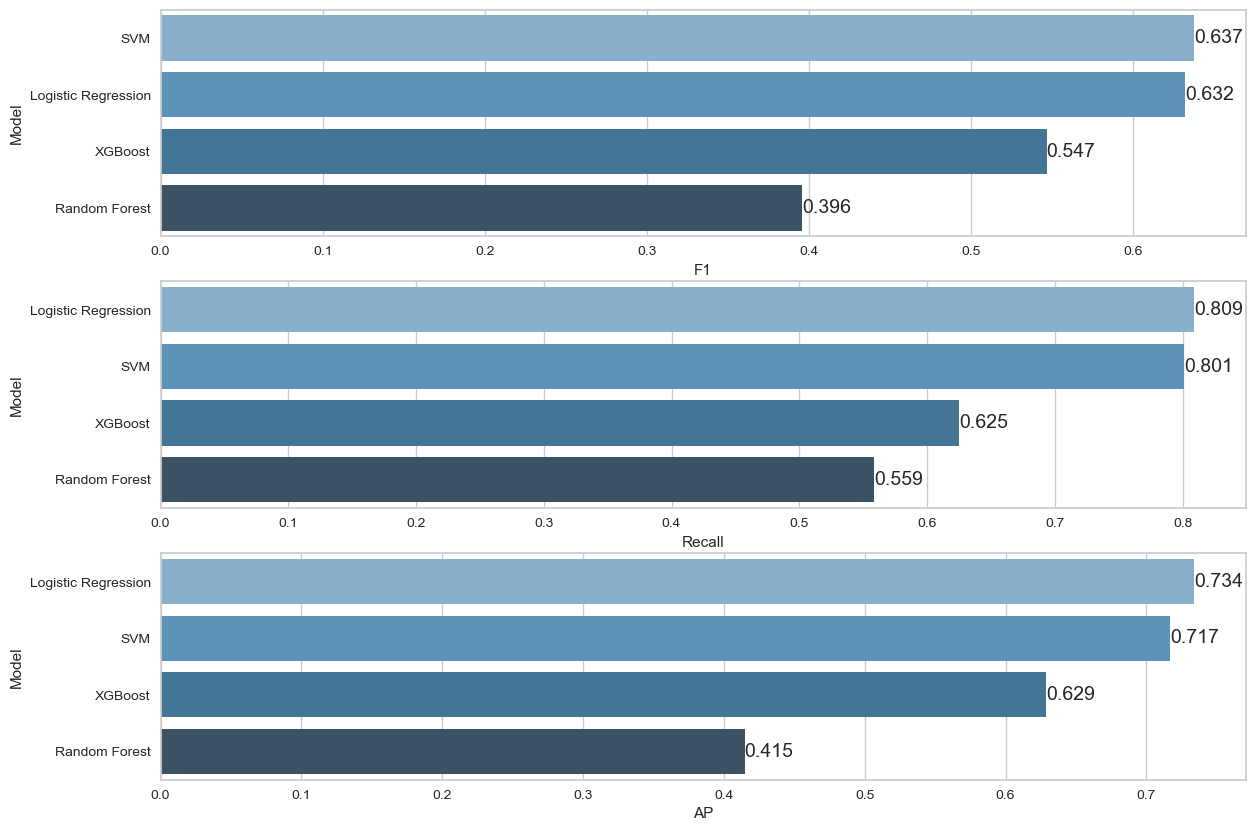

In [293]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [360]:
df=df2.copy()
X = df.drop("DODRace", axis=1)


In [361]:
X = pd.get_dummies(data=X, drop_first=True)
y = df.DODRace


In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y)

In [363]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', penalty= 'l2', solver= 'lbfgs', C= 1.18, max_iter=2000,random_state=101))]
final_log = Pipeline(steps=operations)

In [364]:
final_log.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=1.18, class_weight='balanced',
                                    max_iter=2000, random_state=101))])

In [366]:
final_log.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

In [367]:
y[201]

'Hispanic'

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [368]:
from sklearn.metrics import matthews_corrcoef  # imbalance data evaluation (accuracy, macro, hispanic, white ....instead of)
y_pred = final_log.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7834556725348187

In [369]:
from sklearn.metrics import cohen_kappa_score  # imbalance data evaluation (accuracy, macro, hispanic, white ....instead of)

y_pred = final_log.predict(X_test)
cohen_kappa_score(y_test, y_pred)

0.7741072807075586

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [384]:
# pip install imblearn

In [377]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [381]:
over = SMOTE(sampling_strategy={"Hispanic": 1200}) 
under = RandomUnderSampler(sampling_strategy={"White": 2500}) 

In [382]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [383]:
y_resampled.value_counts()

DODRace
White       2500
Hispanic    1200
Black       1038
Name: count, dtype: int64

In [385]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

## Logistic Regression Over/Under Sampling

In [386]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced', penalty= 'l2', solver= 'lbfgs', C= 1.18, max_iter=2000,random_state=101))]


In [387]:
smote_pipeline = imbpipeline(steps=operations)

In [388]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=1.18, class_weight='balanced',
                                    max_iter=2000, random_state=101))])

In [389]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[245   5  10]
 [  7 101  28]
 [ 27  56 675]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.62      0.74      0.68       136
       White       0.95      0.89      0.92       758

    accuracy                           0.88      1154
   macro avg       0.82      0.86      0.83      1154
weighted avg       0.89      0.88      0.89      1154


Train_Set
[[ 982   22   34]
 [  34  414   95]
 [  63  225 2746]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93      1038
    Hispanic       0.63      0.76      0.69       543
       White       0.96      0.91      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.83      0.87      0.85      4615
weighted avg       0.91      0.90      0.90      4615



In [390]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.634206
test_precision_Hispanic    0.599231
test_recall_Hispanic       0.675724
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
#pip install shap

In [391]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [392]:
log_shap = LogisticRegression(class_weight='balanced', penalty= 'l1', solver= 'saga', C= 1.18, max_iter=2000,random_state=101)
log_shap.fit(X_train_scaled, y_train)

LogisticRegression(C=1.18, class_weight='balanced', max_iter=2000, penalty='l1',
                   random_state=101, solver='saga')

In [393]:
eval_metric(log_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[244   9   7]
 [  5 110  21]
 [ 28  91 639]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.52      0.81      0.64       136
       White       0.96      0.84      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 973   36   29]
 [  19  457   67]
 [  68  347 2619]]


              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.89      4615



In [ ]:
# pip install shap

In [396]:
import shap
explainer = shap.Explainer(log_shap,X_train_scaled)  
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

In [397]:
shap_values

[array([[ 0.        ,  0.        ,  0.        , -0.31781568,  0.        ,
         -0.07370416,  0.        ,  0.        ,  0.13398694, -0.50477234,
          0.        , -0.01660302,  0.75822158, -0.04810931, -0.11321883,
          0.        ,  0.0536423 ,  0.01928193,  0.3661233 ,  0.        ,
          0.        ,  0.        , -0.23512711, -0.10572296, -0.20690077,
         -0.07460132,  0.        , -0.02483652, -0.0101282 , -0.01501292,
         -0.01018308,  0.10222029,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.12537791, -0.21524236,  0.33352615,
          0.        ,  0.        ,  0.        ,  0.32944897, -0.05175054,
          0.20151139,  0.        ,  0.40557866,  0.64263072, -0.13321662,
         -0.63534526, -0.1188251 ,  0.17668331,  0.        , -0.10691021,
          0.        , -0.0340358 , -0.06007763, -0.08223544,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.17191482,
          0.        ,  0.24536494,  0.

In [398]:
shap_values[0].shape

(1, 232)

In [399]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],# for hispanic 
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

The log_model predicted: Hispanic


In [400]:
explainer.expected_value[1]

-1.2836594579997436

In [401]:
X_test_scaled[203]

array([0.37162162, 0.55493482, 0.58333333, 0.60583942, 0.57433809,
       0.67521368, 0.65957447, 0.88349515, 0.5729927 , 0.62424242,
       0.75714286, 0.69444444, 0.7027027 , 0.44137931, 0.76595745,
       0.56325823, 0.54696133, 0.50717703, 0.56809339, 0.54222222,
       0.56809339, 0.63584906, 0.76666667, 0.56976744, 0.45070423,
       0.59960159, 0.52019002, 0.54601227, 0.51555556, 0.52380952,
       0.48571429, 0.38095238, 0.53      , 0.71595331, 0.63265306,
       0.7079646 , 0.67721519, 0.56435644, 0.62686567, 0.63793103,
       0.66320166, 0.68421053, 0.68181818, 0.5505618 , 0.5       ,
       0.6171875 , 0.76      , 0.70833333, 0.73333333, 0.46116505,
       0.51724138, 0.57437071, 0.53846154, 0.76369863, 0.76383764,
       0.524     , 0.59533074, 0.5785124 , 0.56      , 0.588     ,
       0.75384615, 0.71304348, 0.74458874, 0.62686567, 0.58333333,
       0.57272727, 0.66666667, 0.79679144, 0.63815789, 0.79487179,
       0.68953069, 0.72037915, 0.62207358, 0.67794486, 0.62068

In [402]:
shap.force_plot(explainer.expected_value[0],
                shap_values[0], # for white
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

In [403]:
shap.force_plot(explainer.expected_value[2],
                shap_values[2], # for black
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

## Shap values for all data

In [404]:
explainer = shap.Explainer(log_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

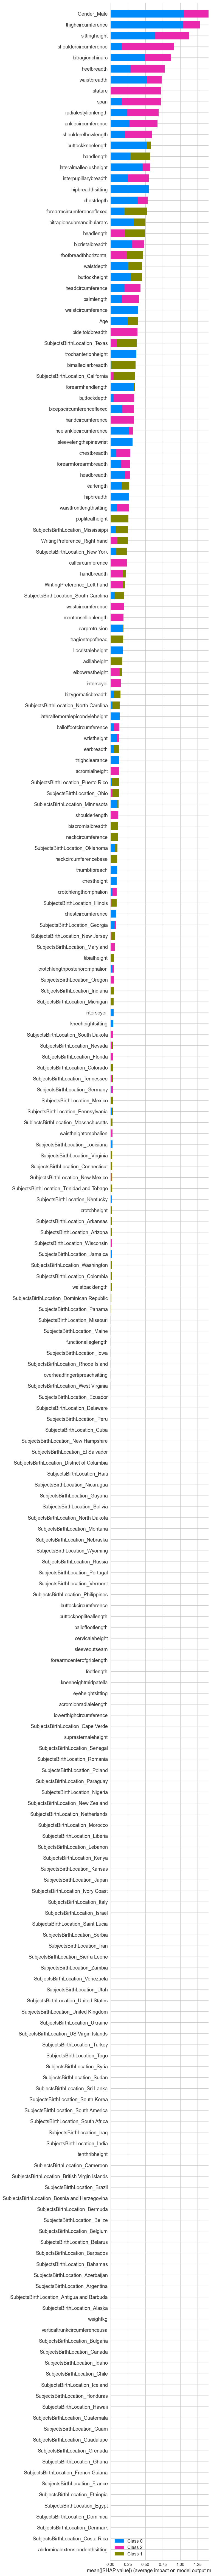

In [405]:
shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

In [406]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [ ]:
#list(X.columns)

In [407]:
X3 = df[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.DODRace

In [408]:
X3.shape

(5769, 154)

In [409]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=101, stratify =y)

In [410]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101, C=1.8,
                                                                    penalty="l1", solver='saga'))] 
pipe_shap_model = Pipeline(steps=operations)

In [411]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=1.8, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='saga'))])

In [412]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[215  12  33]
 [  8 106  22]
 [ 98 125 535]]
              precision    recall  f1-score   support

       Black       0.67      0.83      0.74       260
    Hispanic       0.44      0.78      0.56       136
       White       0.91      0.71      0.79       758

    accuracy                           0.74      1154
   macro avg       0.67      0.77      0.70      1154
weighted avg       0.80      0.74      0.75      1154


Train_Set
[[ 879   44  115]
 [  32  444   67]
 [ 352  508 2174]]
              precision    recall  f1-score   support

       Black       0.70      0.85      0.76      1038
    Hispanic       0.45      0.82      0.58       543
       White       0.92      0.72      0.81      3034

    accuracy                           0.76      4615
   macro avg       0.69      0.79      0.72      4615
weighted avg       0.82      0.76      0.77      4615



In [413]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.538386
test_precision_Hispanic    0.419312
test_recall_Hispanic       0.754848
dtype: float64

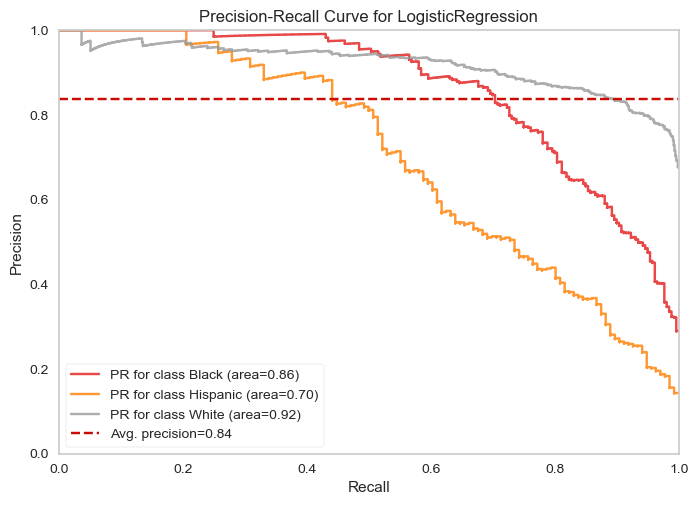

In [414]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

## SMOTE for X3 dataset

In [415]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [416]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [417]:
smote_pipeline_2.fit(X_train3, y_train3)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [418]:
eval_metric(smote_pipeline_2, X_train3, y_train3, X_test3, y_test3) # over, under is not working this dataset 

Test_Set
[[216   9  35]
 [ 12  94  30]
 [121  80 557]]
              precision    recall  f1-score   support

       Black       0.62      0.83      0.71       260
    Hispanic       0.51      0.69      0.59       136
       White       0.90      0.73      0.81       758

    accuracy                           0.75      1154
   macro avg       0.68      0.75      0.70      1154
weighted avg       0.79      0.75      0.76      1154


Train_Set
[[ 881   34  123]
 [  45  380  118]
 [ 411  313 2310]]
              precision    recall  f1-score   support

       Black       0.66      0.85      0.74      1038
    Hispanic       0.52      0.70      0.60       543
       White       0.91      0.76      0.83      3034

    accuracy                           0.77      4615
   macro avg       0.70      0.77      0.72      4615
weighted avg       0.81      0.77      0.78      4615



In [419]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.566182
test_precision_Hispanic    0.505758
test_recall_Hispanic       0.646229
dtype: float64

## Find the best threshold for multiclassification

In [420]:
y2 = y.map({"Hispanic":1, "White":0, "Black":0})

In [421]:
y2

0       0
1       0
2       0
3       0
4       0
       ..
5764    1
5765    1
5766    0
5767    1
5768    1
Name: DODRace, Length: 5769, dtype: int64

In [422]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=101, stratify =y2)

In [423]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_shap_model2 = Pipeline(steps=operations)

In [424]:
pipe_shap_model2.fit(X_train4, y_train4)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [425]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)

Test_Set
[[822 196]
 [ 28 108]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1018
           1       0.36      0.79      0.49       136

    accuracy                           0.81      1154
   macro avg       0.66      0.80      0.69      1154
weighted avg       0.89      0.81      0.83      1154


Train_Set
[[3381  691]
 [  88  455]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      4072
           1       0.40      0.84      0.54       543

    accuracy                           0.83      4615
   macro avg       0.69      0.83      0.72      4615
weighted avg       0.91      0.83      0.85      4615



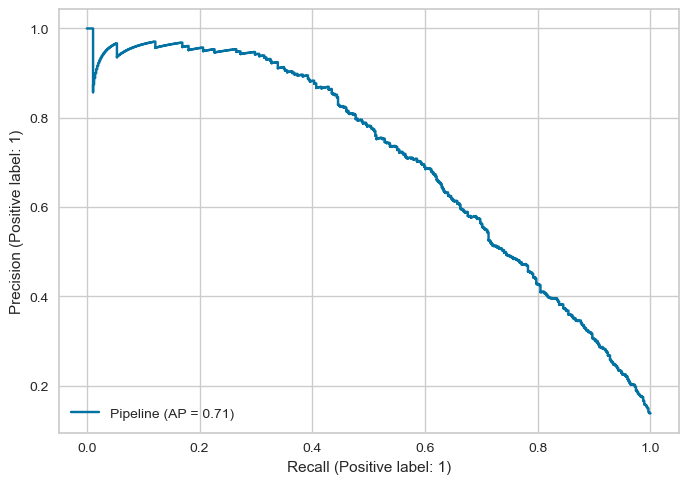

In [426]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000,random_state=101))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

In [427]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])

0.7054275890950658

In [428]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [429]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.31482999266772155

In [430]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [431]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

[[679 339]
 [ 18 118]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1018
           1       0.26      0.87      0.40       136

    accuracy                           0.69      1154
   macro avg       0.62      0.77      0.59      1154
weighted avg       0.89      0.69      0.75      1154



In [432]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

[[2806 1266]
 [  40  503]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81      4072
           1       0.28      0.93      0.44       543

    accuracy                           0.72      4615
   macro avg       0.64      0.81      0.62      4615
weighted avg       0.90      0.72      0.77      4615



In [433]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [434]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

Accuracy      70.92%  std 1.84%
Precision-1   27.46%  std 1.47%
Recall-1      89.32%  std 5.08%
F1_score-1    41.98%  std 2.02%
